### Core Library Imports

This initial block imports the necessary libraries for our slot machine simulation:

*   `random as rand`: Used for generating random numbers, essential for simulating the slot machine spins.
*   `matplotlib.pyplot as plt`: Provides functionalities for creating static visualizations, which we use to display probabilities and the slot machine reels.
*   `matplotlib.patches as patches`: Enables the drawing of geometric shapes like circles, used for representing the individual slots visually.

In [138]:
import random as rand
import turtle
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Game Configuration and Slot Mechanics in the Variables

This block sets up the fundamental configuration and object-oriented structure for our slot machine:

*   **`strip`**: Defines the symbols on the slot machine's virtual strip. Each digit represents a unique symbol, with repetitions indicating their frequency (and thus probability).
*   **`rate1, rate2, rate3`**: These are the payout multipliers for winning combinations of symbols 1, 2, and 3, respectively.
*   **`balance, choice`**: Variables to manage the player's money and their interaction choice (deposit, withdraw, bet, or terminate).
*   **`class slots()`**: This class defines the structure for a single slot reel. Each `slots` object will hold its `currentroll` (the symbol it landed on) and its `colour` for visualization.
*   **`leftslot, middleslot, rightslot`**: Instances of the `slots` class, representing the three individual reels of our slot machine.
*   **`slotmachine`**: A list holding these three `slots` instances, allowing us to easily iterate and manage all reels together.

In [139]:
strip="1111222222233333333333333"
rate1, rate2, rate3=40, 10, 3
balance=0
choice=0

class slots():
  def __init__(self):
    self.currentroll =None
    self.colour= None

leftslot, middleslot, rightslot = slots(), slots(), slots()
slotmachine=[leftslot, middleslot, rightslot]

### Basic Probability and Fairness Testing

This section is crucial for understanding the underlying mathematics and fairness of our slot machine. It introduces functions to calculate fundamental probabilities:

*   `singleprobability`: Determines the likelihood of any single symbol appearing on a reel.
*   `tripleprobability`: Calculates the chance of a specific symbol appearing on all three reels, resulting in a winning combination.

Using these, we compute and display the probabilities for landing jackpot, rare, and common wins. More importantly, we calculate the **Expected Value (EV)**. The EV is a vital metric that helps us understand the long-term profitability of the game for the casino and, conversely, the average return for the player. A positive EV for the casino means it's designed to profit over time, while a player typically looks for an EV closer to 100%.

Finally, a bar graph visually compares these win probabilities, offering a clear and intuitive way to see how likely each winning scenario is within the slot machine's design.

The probability of 1 is: 0.16
The probability of 2 is: 0.28
The probability of 3 is: 0.56
The jackpot win probability is: 0.4096000000000001
The rare win probability is: 2.1952000000000007
The common win probability is: 17.561600000000006
The casino win probability: -19.166400000000007
The EV value of this casino is: 91.02080000000004 %


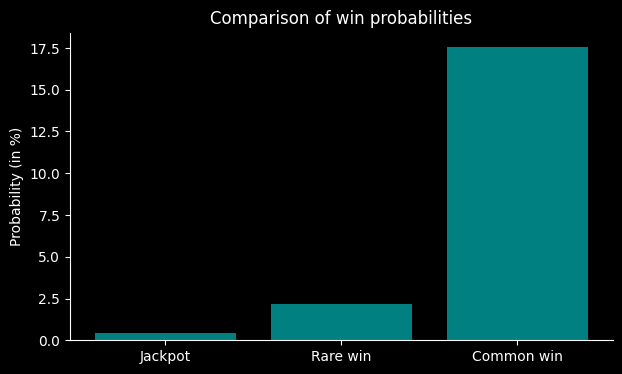

In [140]:
def singleprobability(fav, total):
  return fav/total

def tripleprobability(singleprob):
  return singleprob**3

def favfinder(digit):
  initialise=0
  for num in strip:
    if num==str(digit):
      initialise+=1
  return initialise

prob1, prob2, prob3= singleprobability(favfinder(1),len(strip)), singleprobability(favfinder(2),len(strip)), singleprobability(favfinder(3),len(strip))

print("The probability of 1 is:", prob1)
print("The probability of 2 is:", prob2)
print("The probability of 3 is:", prob3)

probabilitydatawin=[tripleprobability(prob1)*100, tripleprobability(prob2)*100, tripleprobability(prob3)*100]

print("The jackpot win probability is:", probabilitydatawin[0])
print("The rare win probability is:", probabilitydatawin[1])
print("The common win probability is:", probabilitydatawin[2])
print("The casino win probability:", (1-sum(probabilitydatawin)))

#EV calculation
ev= (probabilitydatawin[0]*rate1)+(probabilitydatawin[1]*rate2)+(probabilitydatawin[2]*rate3)

print("The EV value of this casino is:", ev, "%") #Average casinos have it in range of 85% to 98%

labels=["Jackpot", "Rare win", "Common win"]
fig = plt.figure(figsize=(7, 4), facecolor='black')
ax = fig.add_subplot(111)
ax.bar(labels, probabilitydatawin, color='teal')
ax.set_facecolor('black')
ax.set_ylabel('Probability (in %)', color='white')
ax.set_title('Comparison of win probabilities', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
plt.show()

### Core Game Functions

This block contains the essential functions that implement the mechanics of our slot machine:

*   **`slot()`**: This function simulates the roll of a single reel by randomly selecting a symbol from the `strip`. It's the heart of the randomness for each spin.
*   **`color(slotcode)`**: Assigns a specific color to each symbol (1, 2, or 3) for visualization purposes, making the reels distinct and easy to identify on the plot.
*   **`spin()`**: Executes a full spin of the slot machine. It iterates through all three reels, assigns a random symbol (using `slot()`), and updates their corresponding colors (using `color()`).
*   **`checkwin()`**: Determines if the player has won after a spin. It checks if all three reels display the same symbol and returns a `winstatus` indicating the type of win (Jackpot, Rare, Common) or no win.
*   **`updatebalonroll(bet, winstatus)`**: Adjusts the player's balance based on the outcome of a spin. It calculates winnings (if any) by multiplying the `bet` with the respective `rate` for the `winstatus`.
*   **`updatebalondeposit(deposit)`**: Increases the player's balance when they deposit money.
*   **`updatebalonwithdrawal(withdrawal)`**: Decreases the player's balance when they withdraw money.
*   **`updatebalonbet(bet)`**: Decreases the player's balance by the amount they bet before a spin.

In [141]:
def slot():
  randomvalue=rand.randrange(len(strip))
  return int(strip[randomvalue])

def color(slotcode):
  if slotcode==1:
    return "#B7BDF7"
  elif slotcode==2:
    return "#FF9B51"
  else:
    return "#BFC9D1"

def spin():
  for reel in slotmachine:
    reel.currentroll= slot()
    reel.colour= color(reel.currentroll)

def checkwin():
  check=[]
  winstatus=0
  for reel in slotmachine:
    check.append(reel.currentroll)
  if check[0]==check[1]==check[2]:
    if check[0]==1:
      winstatus=3
    elif check[0]==2:
      winstatus=2
    else:
     winstatus=1
  else:
    winstatus=0
  return winstatus

def updatebalonroll(bet, winstatus):
  if winstatus==0:
    return balance
  elif winstatus==1:
    return balance+rate3*bet
  elif winstatus==2:
    return balance+rate2*bet
  elif winstatus==3:
    return balance+rate1*bet

def updatebalondeposit(deposit):
  return balance+deposit

def updatebalonwithdrawal(withdrawal):
  return balance-withdrawal

def updatebalonbet(bet):
  return balance-bet


### User Interaction and Game Flow Functions

This block defines the functions that facilitate player interaction and control the overall flow of the game:

*   **`takedeposit()`**: Prompts the player to deposit money, validates the input, and updates their balance.
*   **`withdraw()`**: Allows the player to withdraw money, ensuring they have sufficient funds.
*   **`collectbet()`**: Takes the player's bet for a round, validates it against their current balance, and deducts it.
*   **`introduction()`**: Displays a welcome message and game rules at the start, setting up the initial player balance.
*   **`actionchoice()`**: Presents the player with options (deposit, withdraw, bet, terminate) and captures their choice.
*   **`windeclaration(ifwon)`**: Announces the outcome of a spin (win type or loss) and informs the player of their updated balance.
*   **`terminate()`**: Ends the game, displays the final balance, and resets the game state.

In [142]:
def takedeposit():
  global balance
  while True:
    dep=float(input("Enter the amount you want to deposit:"))
    if dep>0:
      balance= updatebalondeposit(dep)
      print(f"The amount {dep} has been deposited successfully. \nCurrent account balance is {balance}")
      break
    else:
      print("Please enter a valid amount.")

def withdraw():
  global balance
  while True:
    wit=float(input("Enter the amount you want to withdraw:"))
    if wit>0 and wit<=balance:
      balance= updatebalonwithdrawal(wit)
      print(f"The amount {wit} has been whithdrawn successfully. \nCurrent account balance is {balance}")
      break
    else:
      print("Please enter a valid amount.")

def collectbet():
  global balance
  while True:
    bet=float(input("Enter the amount you want to bet this round:"))
    if bet>0 and bet<=balance:
      balance= updatebalonbet(bet)
      print(f"The amount {bet} has been successfully allotted on this bet. \nCurrent account balance is {balance}")
      break
    else:
      print("Please enter a valid amount.")
  return bet

def introduction():
  print("Welcome to Unlimitedmoneycasino.com!")
  print("Get ready to try your luck on our 3-reel slot machine.")
  print("Match three symbols to win big! Here are our payout rates:")
  print(f"  - Match three '1's for a jackpot: {rate1}x your bet!")
  print(f"  - Match three '2's for a rare win: {rate2}x your bet!")
  print(f"  - Match three '3's for a common win: {rate3}x your bet!")
  print("Let's get started!")
  print(f"Your current balance is {balance}")
  takedeposit()

def actionchoice():
  global choice
  print("Choose what you want to do:")
  print("1. Deposit \n2. Withdraw \n3. Bet \n4. Terminate program")
  choice=int(input("What is your choice:"))

def windeclaration(ifwon):
  global balance
  if ifwon==0:
    print(f"Sorry you did not win anything. Better luck next time! .\nYour current balance is {balance}")
  if ifwon==1:
    print(f"You have gotten a common win! Congratulations! .\nYour current balance is {balance}")
  if ifwon==2:
    print(f"You have gotten a rare win! Congratulations! .\nYour current balance is {balance}")
  if ifwon==3:
    print(f"You have gotten a Jackpot! Congratulations! .\nYour current balance is {balance}")

def terminate():
  global balance
  print("Thank you for playing. Visit again!")
  print(f"You left with {balance}")
  balance=updatebalonwithdrawal(balance)
  print(f"New balance={balance}")

### Slot Machine Visualization

This block contains the `drawcircle()` function, responsible for graphically displaying the current state of the slot machine's reels. It uses `matplotlib.pyplot` and `matplotlib.patches` to:

*   Create a figure and axes with a light background.
*   Iterate through each of the three slot reels.
*   For each reel, it draws a colored circle representing the symbol it landed on. Each circle is positioned horizontally to represent the three distinct reels.
*   Sets appropriate axis limits and an 'equal' aspect ratio to ensure the circles appear correctly.
*   Removes axis ticks, labels, and visible spines for a clean, machine-like aesthetic, focusing solely on the reel symbols.

This function provides the visual feedback to the player after each spin, showing the outcome of their bet in an intuitive way.

In [143]:
def drawcircle():
  fig = plt.figure(figsize=(5, 3), facecolor='#F0F0DB')
  ax = fig.add_subplot(111)
  ax.set_facecolor('#F0F0DB')

  for reel in slotmachine:
    if reel==slotmachine[0]:
      circle1 = patches.Circle((3, 3), 2, facecolor=reel.colour)
      ax.add_patch(circle1)
    if reel==slotmachine[1]:
      circle2 = patches.Circle((8, 3), 2, facecolor=reel.colour)
      ax.add_patch(circle2)
    if reel==slotmachine[2]:
      circle3 = patches.Circle((13, 3), 2, facecolor=reel.colour)
      ax.add_patch(circle3)
  ax.set_xlim(0, 16)
  ax.set_ylim(0, 6)
  ax.set_aspect('equal', adjustable='box')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.show()

### Main Game Loop

This is the heart of the slot machine program, controlling the flow of the game and player interaction. It's an infinite `while True` loop that continues until the player chooses to terminate the program:

1.  **Initial Setup**: It begins by calling `introduction()` to welcome the player and `actionchoice()` to prompt for the first action.
2.  **Continuous Play**: Inside the `while` loop, it continuously checks the player's `choice`:
    *   **Deposit (choice 1)**: Calls `takedeposit()` to add funds to the `balance`.
    *   **Withdraw (choice 2)**: Calls `withdraw()` to remove funds from the `balance`.
    *   **Bet (choice 3)**: This is where the core gameplay happens:
        *   `collectbet()`: Gathers the player's bet for the round.
        *   `spin()`: Initiates the slot machine spin, randomizing the reels.
        *   `drawcircle()`: Visually updates the display to show the new reel outcomes.
        *   `checkwin()`: Determines if the spin resulted in a win.
        *   `updatebalonroll()`: Adjusts the `balance` based on the win/loss.
        *   `windeclaration()`: Informs the player of the outcome.
    *   **Terminate (choice 4)**: Calls `terminate()` to end the game and exits the loop using `break`.
3.  **Balance Check**: Some actions (withdraw, bet) are only allowed if `balance` is not zero.
4.  **Loop Continuation**: After each action (except termination), `actionchoice()` is called again to get the player's next desired action, keeping the game interactive.

Welcome to Unlimitedmoneycasino.com!
Get ready to try your luck on our 3-reel slot machine.
Match three symbols to win big! Here are our payout rates:
  - Match three '1's for a jackpot: 40x your bet!
  - Match three '2's for a rare win: 10x your bet!
  - Match three '3's for a common win: 3x your bet!
Let's get started!
Your current balance is 0
Enter the amount you want to deposit:10
The amount 10.0 has been deposited successfully. 
Current account balance is 10.0
Choose what you want to do:
1. Deposit 
2. Withdraw 
3. Bet 
4. Terminate program
What is your choice:3
Enter the amount you want to bet this round:3
The amount 3.0 has been successfully allotted on this bet. 
Current account balance is 7.0


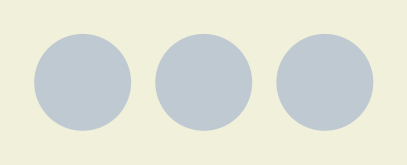

You have gotten a common win! Congratulations! .
Your current balance is 16.0
Choose what you want to do:
1. Deposit 
2. Withdraw 
3. Bet 
4. Terminate program
What is your choice:4
Thank you for playing. Visit again!
You left with 16.0
New balance=0.0


In [144]:
introduction()
actionchoice()
while True:
  if choice==1:
    takedeposit()
  if choice==4:
    terminate()
    break
  if balance!=0:
    if choice==2:
      withdraw()
    elif choice==3:
      currentbet=collectbet()
      spin()
      drawcircle()
      iswin=checkwin()
      balance=updatebalonroll(currentbet, iswin)
      windeclaration(iswin)
    elif choice==4:
      terminate()
      break
  actionchoice()


### Model Limitations and Future Enhancements

This slot machine model provides a foundational understanding of game mechanics, probability, and basic visualization. However, like any simplified model, it has certain limitations and many opportunities for further development:

**Current Limitations:**

*   **Static Configuration**: The `strip` (symbol probabilities) and payout rates are hardcoded, making the game non-dynamic.
*   **Basic Win Conditions**: Only matching three identical symbols results in a win. Real slot machines often have multiple paylines (horizontal, diagonal), wild symbols, and scatter pays.
*   **Simple User Interface**: The visualization is static and purely graphical, lacking interactivity beyond input prompts. There are no animations or complex visual effects.
*   **No Persistence**: Player balances and game history are not saved between sessions.
*   **Limited Error Handling**: While some input validation exists, a more robust system would handle unexpected inputs more gracefully.

**Ideas for Further Development:**

*   **Dynamic Game Configuration**: Allow users to define custom `strip` values, symbol weights, or payout rates, perhaps loaded from a configuration file.
*   **Advanced Win Logic**: Implement multiple paylines (horizontal, diagonal, V-shapes), wild symbols (e.g., a 'W' symbol that can substitute for any number), and scatter symbols (which pay regardless of position).
*   **Bonus Features**: Introduce bonus rounds, free spins, or progressive jackpots.
*   **Graphical User Interface (GUI)**: Migrate the visualization and interaction to a more robust GUI framework like `Tkinter`, `Pygame`, `PyQt`, or even a web-based interface using `Streamlit` or `Flask` to create an interactive experience with animations.
*   **Sound Effects**: Add sound effects for spinning, wins, and losses to enhance immersion.
*   **User Accounts and Persistence**: Implement a simple database (e.g., using `sqlite3`) to save player balances, high scores, and game statistics.
*   **Detailed Analytics**: Expand the probability testing to run thousands or millions of simulated spins to get empirical probabilities and compare them against theoretical ones, providing deeper insights into game fairness and player return.